In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import siiFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [3]:
# bandwidth = 0.01
# grid_x    = grid(bandwidth, start=-5, end=15)
# mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])

# # Chọn độ rộng cố định cho Uniform
# width = 2.0

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [4]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-8, end=25)


std = 0.8
IR = 10
n1, n2 = 10, int(IR * 10)
mu1 = np.random.normal(0, std, n1)
mu2 = np.random.normal(10, std, n2)
sig1 = np.ones_like(mu1)
sig2 = np.ones_like(mu2)

F1 = generateGauss(mu1, sig1, grid_x)
F2 = generateGauss(mu2, sig2, grid_x)
F_data = np.vstack([F1, F2])

In [5]:
cluster=siiFCF.Model(
   grid_x=grid_x,
   seed=42,
    num_clusters=2,
    fuzziness= 2,
    max_iterations= 100,
    tolerance= 1e-6,
    distance_metric= 'OVL',
    verbose = True, 
)
cluster.fit(F_data)
U, Theta, J = cluster.get_results()
labels = cluster.get_hard_assignments()

[SiiFCM] Iter 1 | Obj = 8.043630 | Comp = [0.822 0.576]
[SiiFCM] Iter 2 | Obj = 11.285649 | Comp = [0.876 0.724]
[SiiFCM] Iter 3 | Obj = 5.216011 | Comp = [0.816 0.915]
[SiiFCM] Iter 4 | Obj = 11.872778 | Comp = [0.911 0.69 ]
[SiiFCM] Iter 5 | Obj = 9.736567 | Comp = [0.907 0.646]
[SiiFCM] Iter 6 | Obj = 9.844456 | Comp = [0.912 0.661]
[SiiFCM] Iter 7 | Obj = 5.995325 | Comp = [0.76 0.91]
[SiiFCM] Iter 8 | Obj = 3.897340 | Comp = [0.771 0.913]
[SiiFCM] Iter 9 | Obj = 5.483804 | Comp = [0.712 0.905]
[SiiFCM] Iter 10 | Obj = 7.940782 | Comp = [0.696 0.902]
[SiiFCM] Iter 11 | Obj = 7.242837 | Comp = [0.921 0.695]
[SiiFCM] Iter 12 | Obj = 4.455776 | Comp = [0.925 0.717]
[SiiFCM] Iter 13 | Obj = 10.997210 | Comp = [0.687 0.9  ]
[SiiFCM] Iter 14 | Obj = 10.651519 | Comp = [0.681 0.901]
[SiiFCM] Iter 15 | Obj = 4.914098 | Comp = [0.921 0.727]
[SiiFCM] Iter 16 | Obj = 3.926231 | Comp = [0.921 0.729]
[SiiFCM] Iter 17 | Obj = 4.269918 | Comp = [0.925 0.703]
[SiiFCM] Iter 18 | Obj = 9.957550 | Co

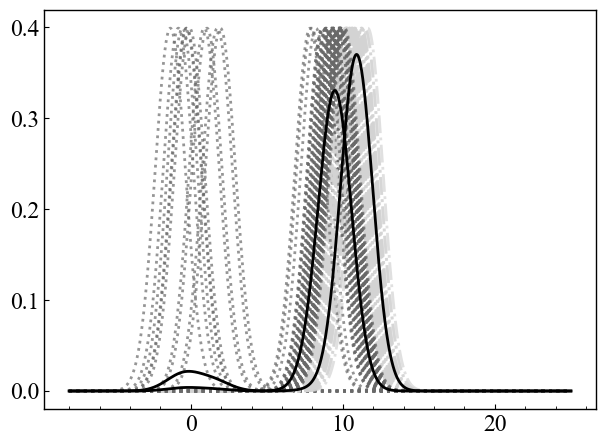

In [6]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=10, h=5, u='centimeters')

# pdfs
for i in range(F_data.shape[0]):
	ls = '-.' if labels[i] == 0 else ':'
	color = 'lightgray' if labels[i] == 0 else 'dimgray'
	plt.plot(grid_x, F_data[i], lw=2, color=color, linestyle=ls, alpha=0.7)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()
# plt.savefig("FCF_V4.pdf", bbox_inches='tight')

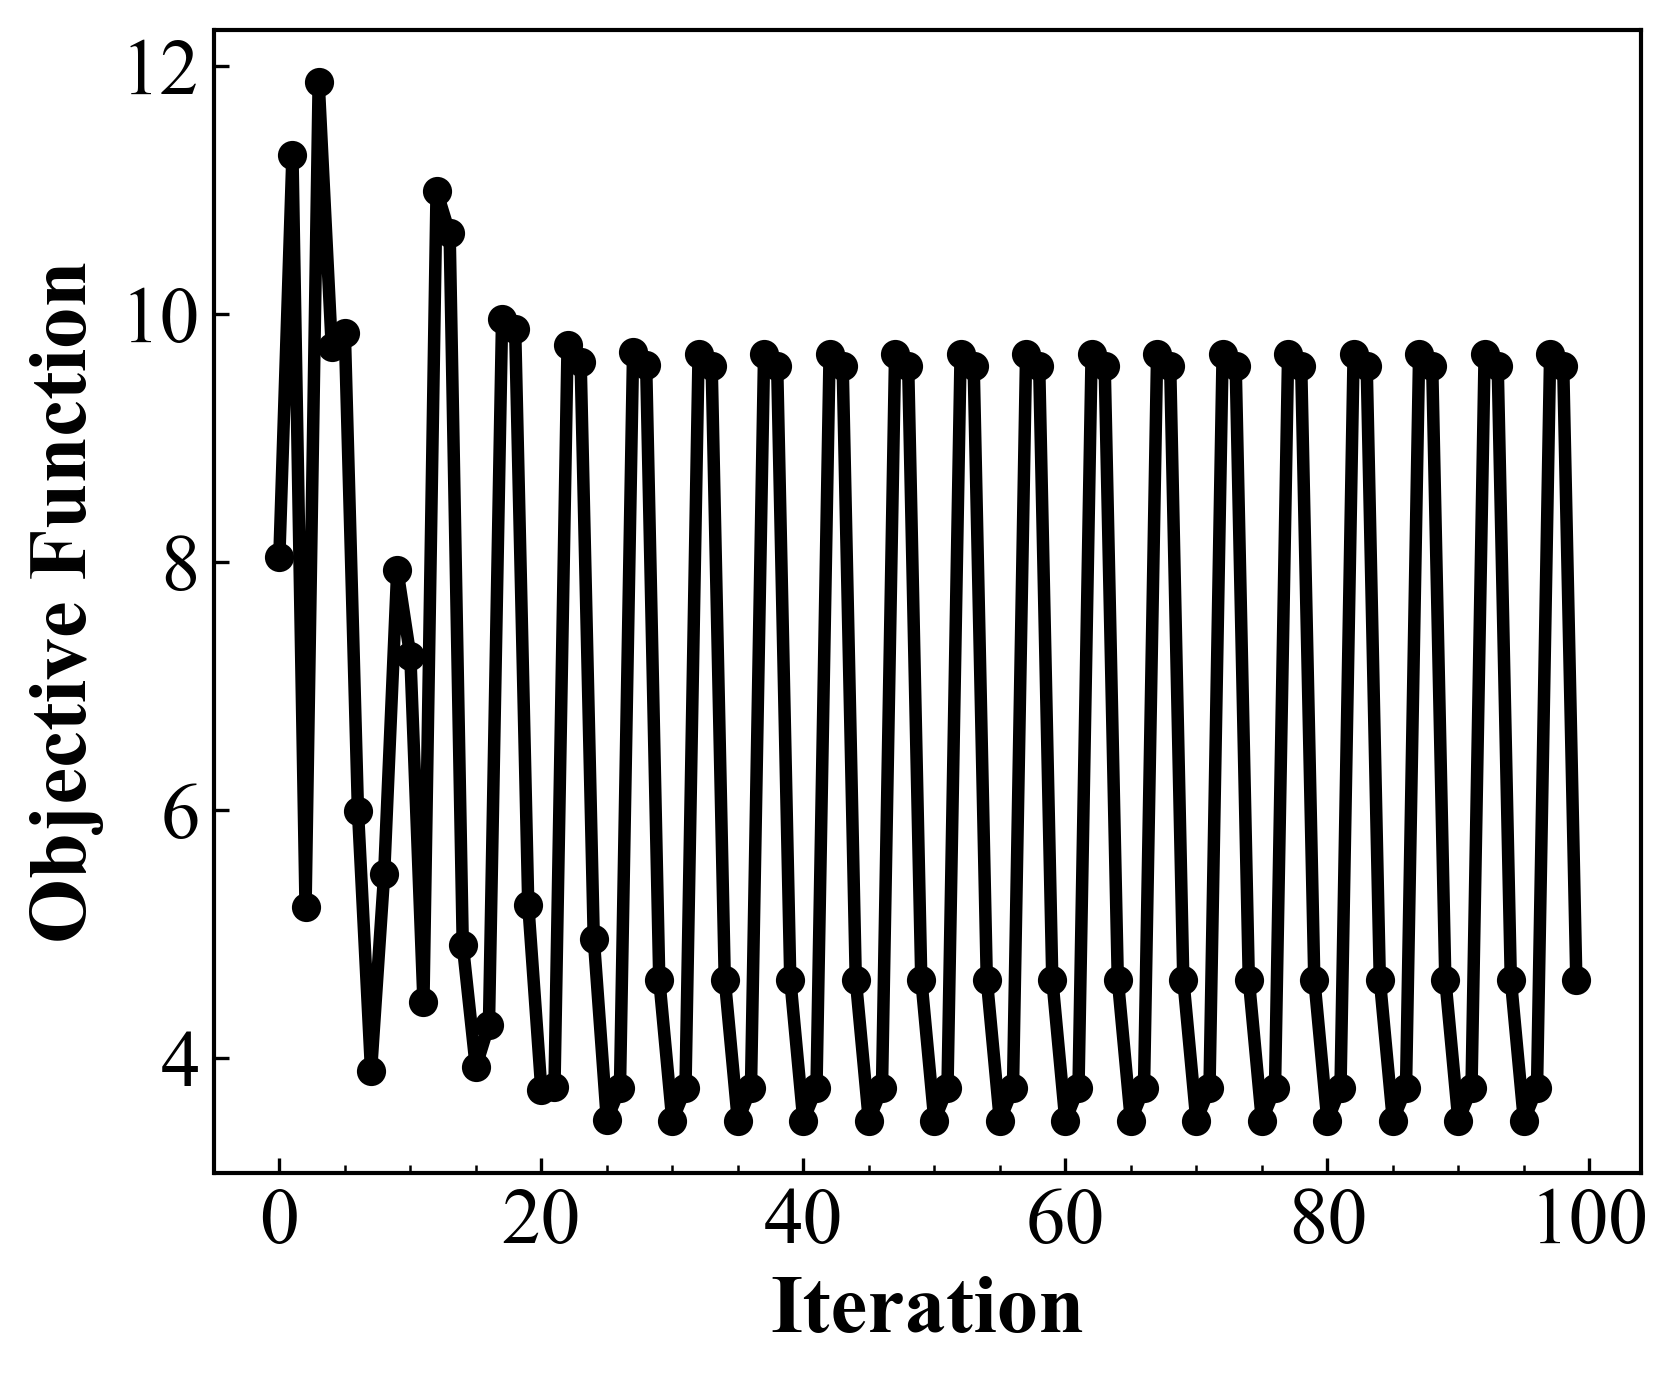

In [7]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()

In [8]:
# from utils.vali import CVI

# evaluator = CVI(distance_metric='BC',bandwidth=bandwidth, grid=grid_x)


# sil = evaluator.silhouette_index(F_data, labels)
# dunn = evaluator.dunn_index(F_data, labels)
# dbi = evaluator.davies_bouldin_index(F_data, labels)

# print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

In [9]:
# sil_values = plot_silhouette_values(F_data, labels,
#                                     distance_metric='BC',
#                                     bandwidth=bandwidth,
#                                     grid=grid_x)
# print("Silhouette fj:", sil_values)

In [10]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = csiFCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)